Import the neccessary libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Set a style for the plots for better visualization

In [61]:
plt.style.use('ggplot')

Data Loading

In [62]:
try:
    df = pd.read_csv("coin_Bitcoin.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'coin_Bitcoin.csv' was not found. Please make sure the file is in the same directory")
    exit()
df

Data loaded successfully!


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


Data Preprocessing

In [63]:
# Rename the columns for clarity and consistency
df.rename(columns={
    "SNo":"serial_number",
    "Name":"name",
    "Symbol":"symbol",
    "Date":"date",
    "High":"high",
    "Low":"low",
    "Open":"open",
    "Close":"close",
    "Volume":"volume",
    "Marketcap":"marketcap"
},inplace=True)

# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Duplicated Rows")
print(df_duplicated)

# Drop any rows with missing values
df.dropna(inplace=True)

# Convert the "date" column to a numerical format for plotting and potential modelling
df["date"] = pd.to_datetime(df["date"])
df["date_ordinal"] = df["date"].apply(lambda date : date.toordinal())

Missing Values
serial_number    0
name             0
symbol           0
date             0
high             0
low              0
open             0
close            0
volume           0
marketcap        0
dtype: int64
Duplicated Rows
0


Feature Engineering

In [64]:
# Select the features (X) and target variable (y)
# We'll use the "high","low","open" and "volume" to predict the "close" price

features = ["high","low","open","volume"]
X = df[features]
y = df["close"]

Visualization before training

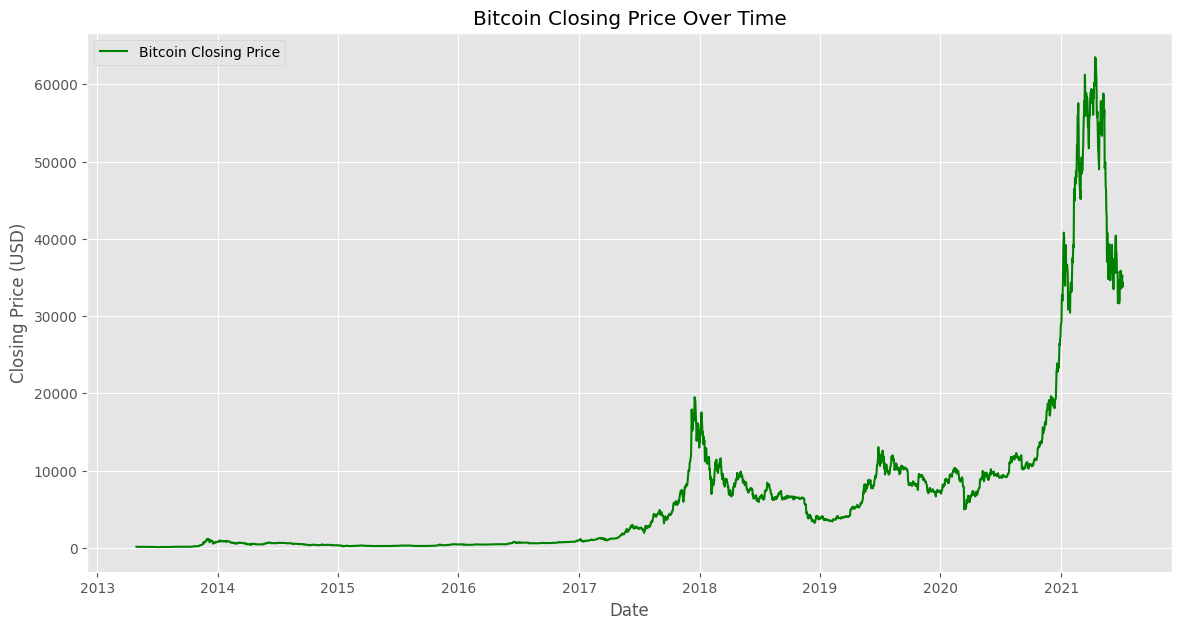

In [65]:
# Create a visualization of the raw data to show the overall trend of Bitcoin's closing price
plt.figure(figsize=(14,7))
plt.plot(df["date"],y,label="Bitcoin Closing Price",color="green")
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

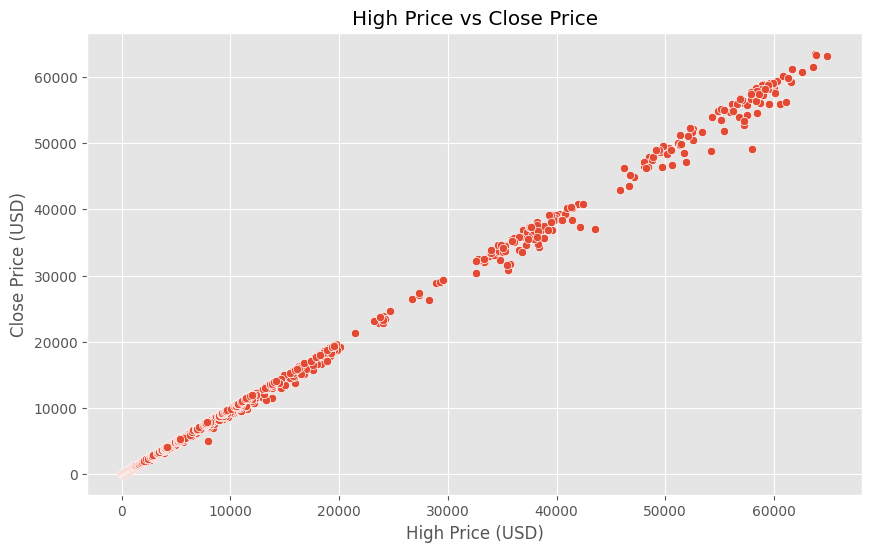

In [66]:
# Create a scatter plot to visualize the relationshp between "high" price and the "close" price
plt.figure(figsize=(10,6))
sns.scatterplot(x="high",y="close",data=df)
plt.title("High Price vs Close Price")
plt.xlabel("High Price (USD)")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

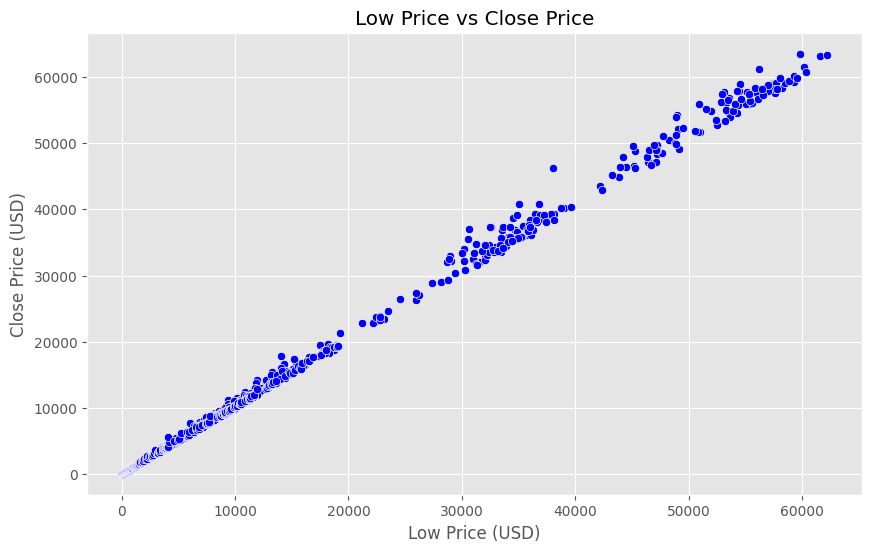

In [67]:
# Create a scatter plot to visualize the relationshp between "low" price and the "close" price
plt.figure(figsize=(10,6))
sns.scatterplot(x="low",y="close",data=df,color="b")
plt.title("Low Price vs Close Price")
plt.xlabel("Low Price (USD)")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

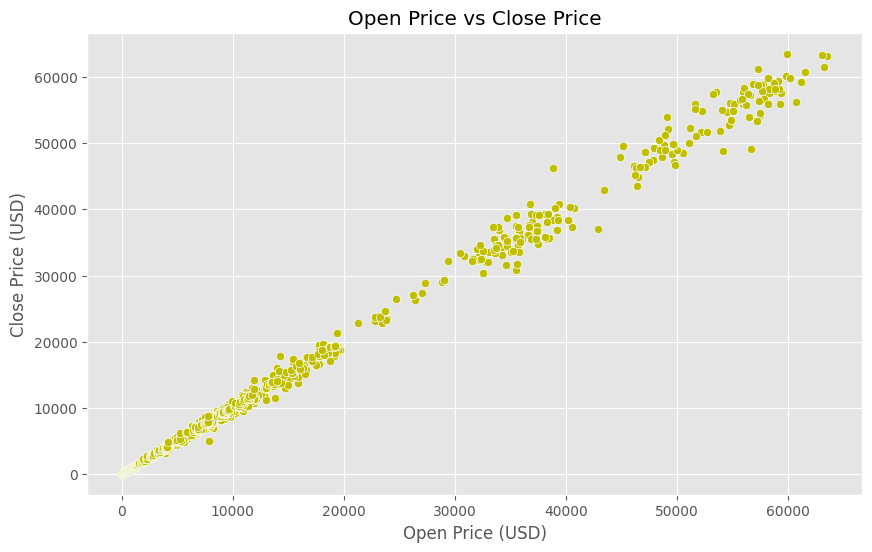

In [68]:
# Create a scatter plot to visualize the relationshp between "open" price and the "close" price
plt.figure(figsize=(10,6))
sns.scatterplot(x="open",y="close",data=df,color="y")
plt.title("Open Price vs Close Price")
plt.xlabel("Open Price (USD)")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

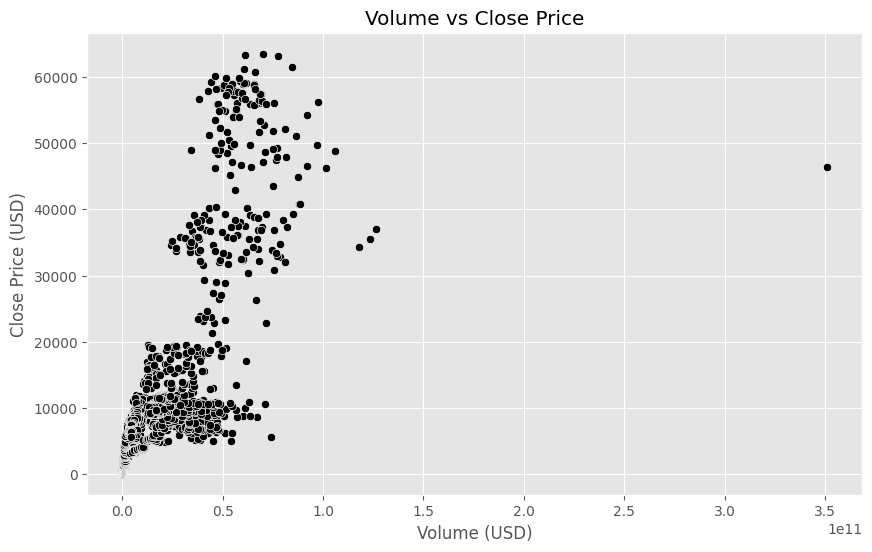

In [69]:
# Create a scatter plot to visualize the relationshp between "volume" and the "close" price
plt.figure(figsize=(10,6))
sns.scatterplot(x="volume",y="close",data=df,color="black")
plt.title("Volume vs Close Price")
plt.xlabel("Volume (USD)")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

Data Splitting

In [70]:
# We'll use the 80% of the data for training and 20% for testing to evaluate the model performance.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Model Training

In [ ]:
# Initialize and train four different regression models

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# Ridge Regression 
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

# ElasticNet Regression
elastic_reg = ElasticNet()
elastic_reg.fit(X_train,y_train)


# Make the predictions on the test set of each model
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_elastic = elastic_reg.predict(X_test)

Model Evaluation

In [72]:
# Linear Regression Metrics
print("-----Linear Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_lin):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_lin):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_lin):.4f}")

# Ridge Regression Metrics
print("-----Ridge Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_ridge):.4f}")
print(f"MAE: {r2_score(y_test,y_pred_ridge):.4f}")
print(f"MSE: {mean_absolute_error(y_test,y_pred_ridge):.4f}")

# Lasso Regression Metrics
print("-----Lasso Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_lasso):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_lasso):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_lasso):.4f}")

# ElasticNet Regression Metrics
print("-----Elastic Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_elastic):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_elastic):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_elastic):.4f}")

-----Linear Regression-----
R-squared: 0.9997
MAE: 65.3692
MSE: 33920.6234
-----Ridge Regression-----
R-squared: 0.9997
MAE: 0.9997
MSE: 65.3692
-----Lasso Regression-----
R-squared: 0.9996
MAE: 71.2359
MSE: 34674.7166
-----Elastic Regression-----
R-squared: 0.9996
MAE: 71.2358
MSE: 34674.7217


Determine the best model

In [73]:
# Determine the best model based on R-squared score (or other metrics)
# In this case, R-squared is a good indicator of overall fit
r2_scores = {
    "Linear": r2_score(y_test,y_pred_lin),
    "Ridge": r2_score(y_test,y_pred_ridge),
    "Lasso": r2_score(y_test,y_pred_lasso),
    "ElasticNet": r2_score(y_test,y_pred_elastic)
}

best_model_name = max(r2_scores,key=r2_scores.get)
print(f"Conclusion: The best performing model is {best_model_name} Regression")


# Select thr best model's predictions for the final visualization
if best_model_name == "Linear":
    y_pred_best = y_pred_lin
elif best_model_name == "Ridge":
    y_pred_best = y_pred_ridge
elif best_model_name == "Lasso":
    y_pred_best = y_pred_lasso
else:
    y_pred_best = y_pred_elastic

Conclusion: The best performing model is Linear Regression


Visualization after training

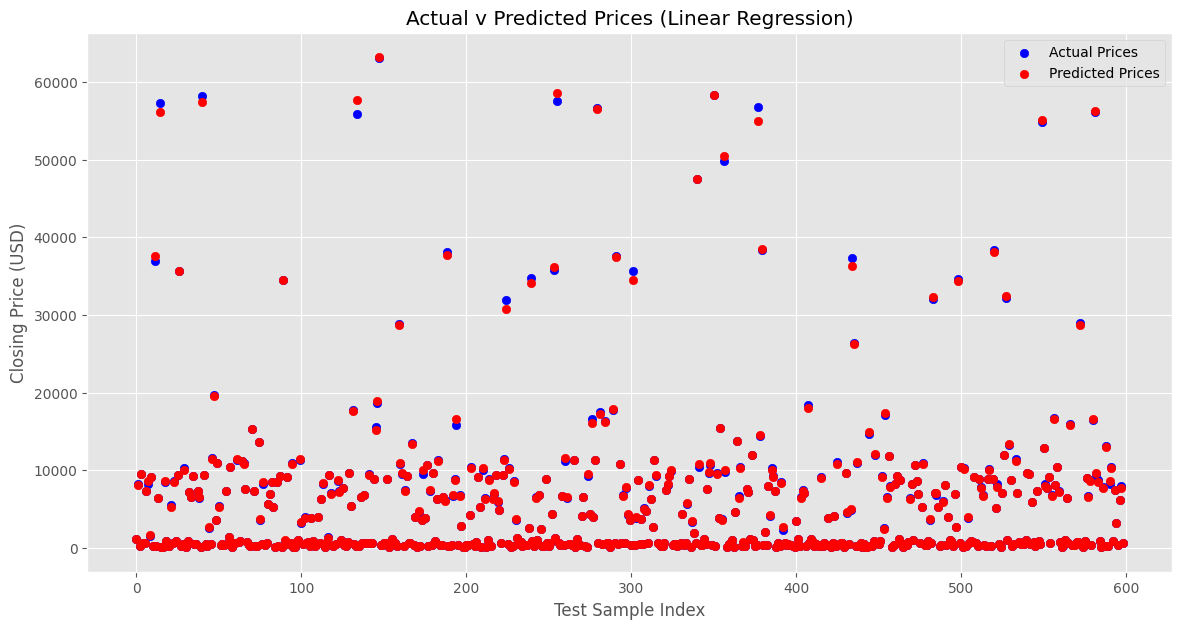

In [74]:
# Create a visualization to compare the actual values with the predictions from the best model
# This plot shows how closely the model's predictions align with real data
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)),y_test,color="blue",label="Actual Prices")
plt.scatter(range(len(y_pred_best)),y_pred_best,color="red",label="Predicted Prices")
plt.title(f"Actual v Predicted Prices ({best_model_name} Regression)")
plt.xlabel("Test Sample Index")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

User Input and Prediction

In [ ]:
print("------Predict Bitcoin Closing Price-----")
print("Enter the following data to predict the closing price:")

try:
    # Prompt the user for the feature values
    high_price = float(input("Enter the High Price:"))
    low_price = float(input("Enter the Low price:"))
    open_price = float(input("Enter the Open Price:"))
    volume = float(input("Enter the Volume:"))

    # Create a new DataFrame with user's input
    # The data must be in the same format as the training data
    new_data = pd.DataFrame([[high_price,low_price,open_price,volume]],columns=features)

    # Use the best-performing model to make a prediction on the new data
    if best_model_name == "Linear":
        predicted_price = lin_reg.predict(new_data)
    elif best_model_name == "Ridge":
        predicted_price = ridge_reg.predict(new_data)
    elif best_model_name == "Lasso":
        predicted_price = lasso_reg.predict(new_data)
    else:
        predicted_price = elastic_reg.predict(new_data)

    # Print the final predicted price
    print(f"Predicted Closing Price: ${predicted_price[0]:.2f}")

except ValueError:
    print("Invalid input. Please enter valid numerical values.")
except Exception as e:
    print(f"An error occurred: {e}")